<a href="https://colab.research.google.com/github/yogendra-gla/OIBSIP/blob/main/IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings(action='ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [96]:
dt = pd.read_csv('/content/Iris.csv')

In [97]:
dt.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [98]:
dt.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [99]:
dt.isna().sum()
dt.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [100]:
dt.tail(100)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [101]:
n = len(dt[dt['Species']=='versicolor'])
print("versicolor=",n)

versicolor= 0


In [102]:
n1 = len(dt[dt['Species']=='virginica'])
print("virginica=",n)

virginica= 0


In [103]:
n2 = len(dt[dt['Species']=='setosa'])
print("setosa=",n)

setosa= 0


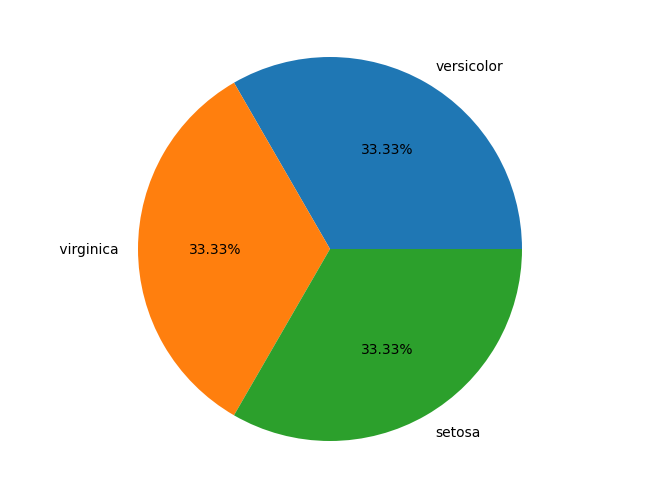

In [104]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['versicolor',' virginica','setosa']
s = [50,50,50]
ax.pie(s ,labels = l, autopct='%1.2f%%')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

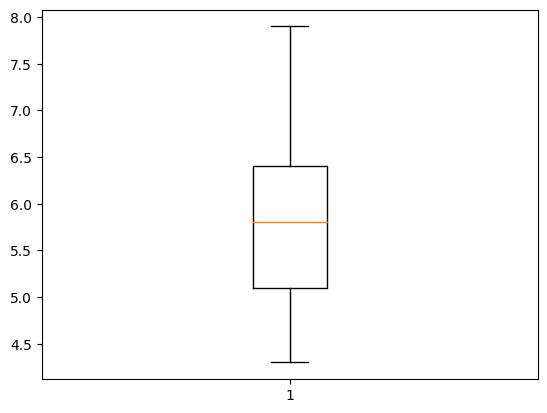

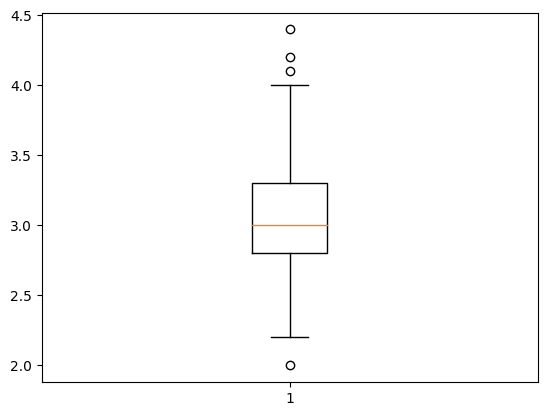

In [105]:
plt.figure(1)
plt.boxplot(dt['SepalLengthCm'])
plt.figure(2)
plt.boxplot(dt['SepalWidthCm'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

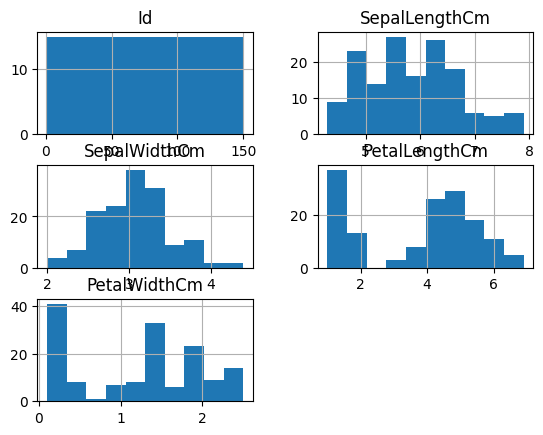

In [106]:
dt.hist()
plt.show

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

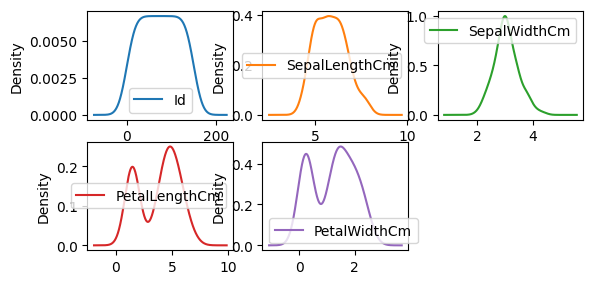

In [107]:
dt.plot(kind='density', subplots=True, layout=(3,3), sharex=False)

Id                  Axes(0.125,0.653529;0.227941x0.226471)
SepalLengthCm    Axes(0.398529,0.653529;0.227941x0.226471)
SepalWidthCm     Axes(0.672059,0.653529;0.227941x0.226471)
PetalLengthCm       Axes(0.125,0.381765;0.227941x0.226471)
PetalWidthCm     Axes(0.398529,0.381765;0.227941x0.226471)
dtype: object

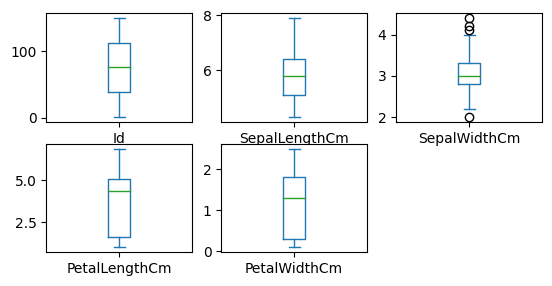

In [108]:
dt.plot(kind='box', subplots=True, layout=(3,3), sharex=False)

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

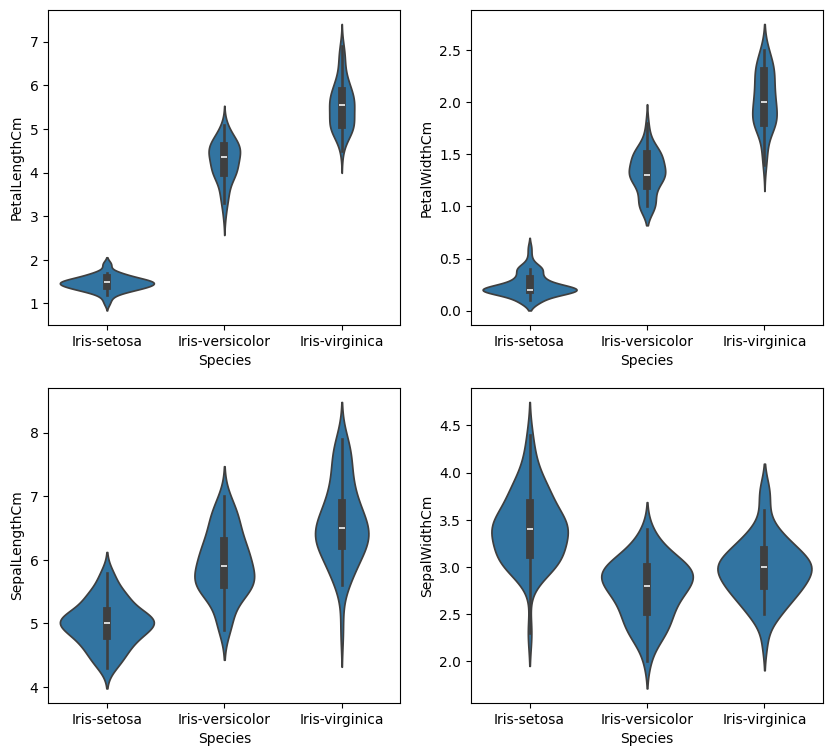

In [109]:
plt.figure(figsize=(10,9))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y='PetalLengthCm',data=dt)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y='PetalWidthCm',data=dt)
plt.subplot(2,2,3)
sns.violinplot(x='Species', y='SepalLengthCm',data=dt)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y='SepalWidthCm',data=dt)


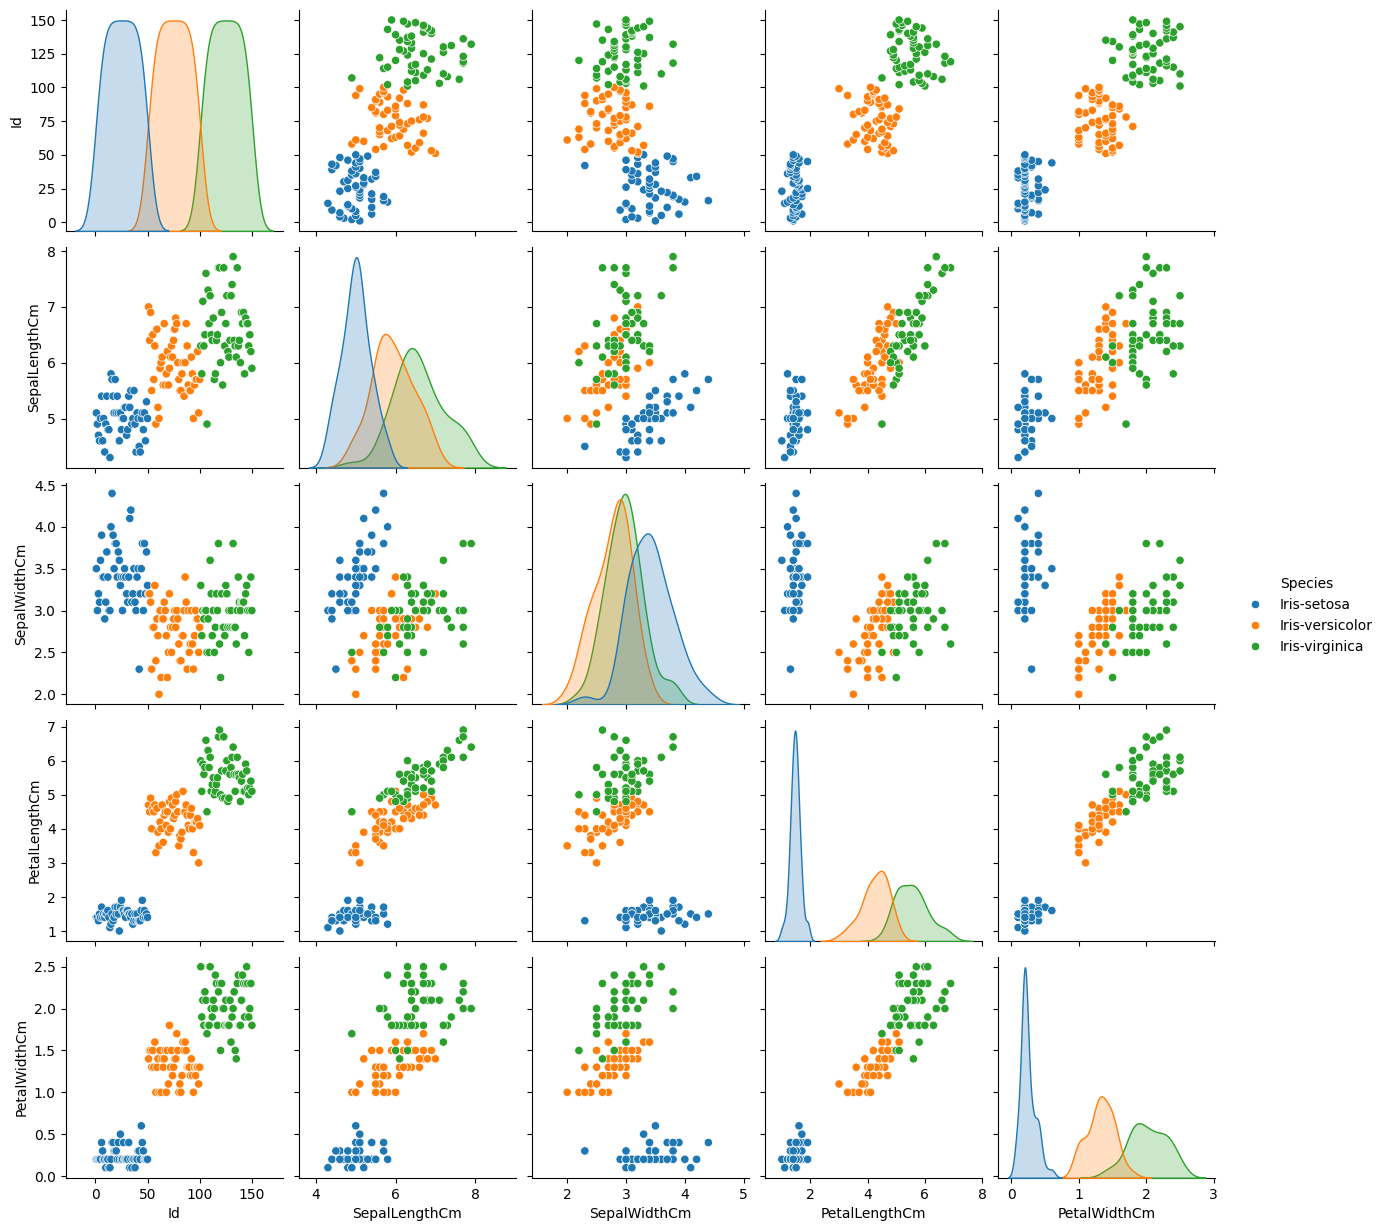

In [110]:
sns.pairplot(dt,hue='Species')

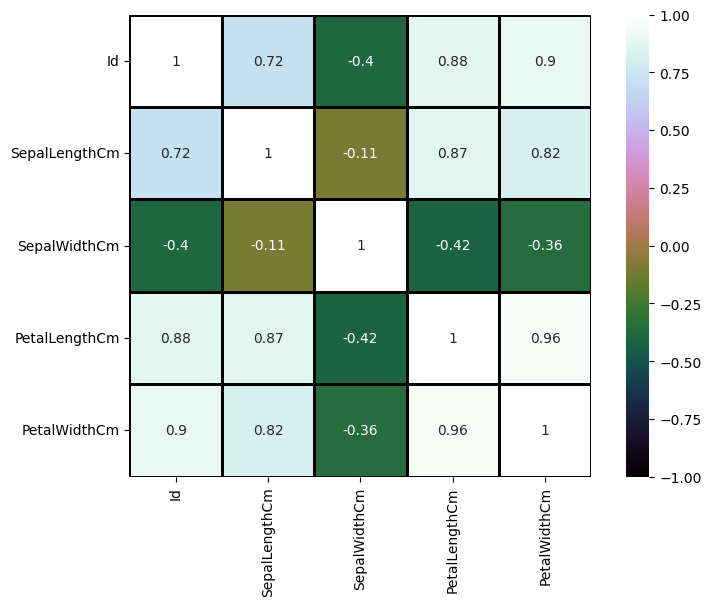

In [111]:
fig=plt.gcf()
fig.set_size_inches(9,6)
fig=sns.heatmap(dt.corr(),annot=True,cmap='cubehelix',linewidths=1,
                linecolor='k', square=True, mask=False, vmin= -1,vmax= 1,cbar_kws={"orientation":"vertical"},cbar=True)

In [112]:
x=dt['SepalLengthCm'].values.reshape(-1,1)
print(x)

y=dt['SepalWidthCm'].values.reshape(-1,1)
print('\n',y)

[[5.1]
 [4.9]
 [4.7]
 [4.6]
 [5. ]
 [5.4]
 [4.6]
 [5. ]
 [4.4]
 [4.9]
 [5.4]
 [4.8]
 [4.8]
 [4.3]
 [5.8]
 [5.7]
 [5.4]
 [5.1]
 [5.7]
 [5.1]
 [5.4]
 [5.1]
 [4.6]
 [5.1]
 [4.8]
 [5. ]
 [5. ]
 [5.2]
 [5.2]
 [4.7]
 [4.8]
 [5.4]
 [5.2]
 [5.5]
 [4.9]
 [5. ]
 [5.5]
 [4.9]
 [4.4]
 [5.1]
 [5. ]
 [4.5]
 [4.4]
 [5. ]
 [5.1]
 [4.8]
 [5.1]
 [4.6]
 [5.3]
 [5. ]
 [7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]
 [5.7]
 [6.3]
 [4.9]
 [6.6]
 [5.2]
 [5. ]
 [5.9]
 [6. ]
 [6.1]
 [5.6]
 [6.7]
 [5.6]
 [5.8]
 [6.2]
 [5.6]
 [5.9]
 [6.1]
 [6.3]
 [6.1]
 [6.4]
 [6.6]
 [6.8]
 [6.7]
 [6. ]
 [5.7]
 [5.5]
 [5.5]
 [5.8]
 [6. ]
 [5.4]
 [6. ]
 [6.7]
 [6.3]
 [5.6]
 [5.5]
 [5.5]
 [6.1]
 [5.8]
 [5. ]
 [5.6]
 [5.7]
 [5.7]
 [6.2]
 [5.1]
 [5.7]
 [6.3]
 [5.8]
 [7.1]
 [6.3]
 [6.5]
 [7.6]
 [4.9]
 [7.3]
 [6.7]
 [7.2]
 [6.5]
 [6.4]
 [6.8]
 [5.7]
 [5.8]
 [6.4]
 [6.5]
 [7.7]
 [7.7]
 [6. ]
 [6.9]
 [5.6]
 [7.7]
 [6.3]
 [6.7]
 [7.2]
 [6.2]
 [6.1]
 [6.4]
 [7.2]
 [7.4]
 [7.9]
 [6.4]
 [6.3]
 [6.1]
 [7.7]
 [6.3]
 [6.4]
 [6. ]
 [6.9]
 [6.7]
 [6.9]
 [5.8]

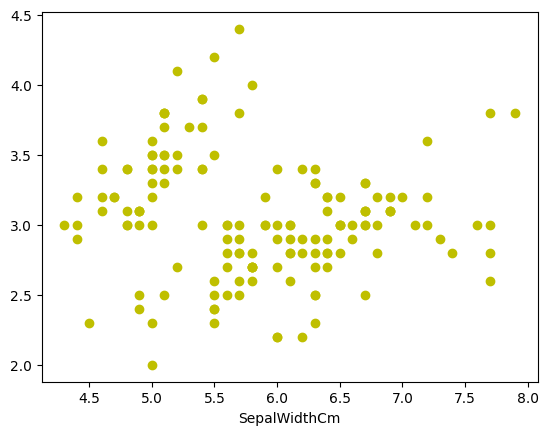

In [113]:
plt.xlabel("SepalLengthCm")
plt.xlabel("SepalWidthCm")
plt.scatter(x,y,color='y')
plt.show()

In [114]:
corr_mat=dt.corr()
print(corr_mat)

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


In [115]:
train,test = train_test_split(dt, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 6)
(38, 6)


In [116]:
train_x = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y = train.Species
test_x = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y = test.Species

In [117]:
train_x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
117,7.7,3.8,6.7,2.2
6,4.6,3.4,1.4,0.3
87,6.3,2.3,4.4,1.3
9,4.9,3.1,1.5,0.1
115,6.4,3.2,5.3,2.3


In [118]:
test_y.head()


22         Iris-setosa
95     Iris-versicolor
53     Iris-versicolor
110     Iris-virginica
100     Iris-virginica
Name: Species, dtype: object

**using LogisticRegression**

In [119]:
model = LogisticRegression()
model.fit(train_x,train_y)
prediction = model.predict(test_x)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))

Accuracy: 0.8947368421052632


**confusion_matrix**

In [120]:
confusion_mat = confusion_matrix(test_y,prediction)
print("confusion matrix=\n",confusion_mat)
print(classification_report(test_y,prediction))

confusion matrix=
 [[13  0  0]
 [ 0 10  1]
 [ 0  3 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.77      0.91      0.83        11
 Iris-virginica       0.92      0.79      0.85        14

       accuracy                           0.89        38
      macro avg       0.90      0.90      0.89        38
   weighted avg       0.90      0.89      0.90        38



**using support vector**

In [121]:
model1 = SVC()
model1.fit(train_x,train_y)
pred_y = model1.predict(test_x)
print("accuracy:",accuracy_score(test_y,pred_y))

accuracy: 0.8947368421052632


**using KNN**

In [122]:
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_x,train_y)
pred2_y = model2.predict(test_x)
print("accuracy:",accuracy_score(test_y,pred2_y))

accuracy: 0.9210526315789473


**Using GuassianNB**

In [123]:
model3 = GaussianNB()
model3.fit(train_x,train_y)
pred3_y = model3.predict(test_x)
print("accuracy:",accuracy_score(test_y,pred3_y))

accuracy: 0.9210526315789473


**using decisionTree**

In [124]:
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(train_x,train_y)
pred4_y = model4.predict(test_x)
print("accuracy:",accuracy_score(test_y,pred4_y))

accuracy: 0.8421052631578947


In [125]:
results = pd.DataFrame({
    'model': ['Logistic Regression', 'Support Vector Machine', 'Gaussian Naive Bayes', 'KNN', 'Decision Tree'],
    'score': ['0.9737', '1.0', '0.9474', '1.0', '0.9211']
})
result_df = results.sort_values(by='score', ascending=False)
result_df = result_df.set_index('score')
result_df.head(9)



,model
score,
1.0,Support Vector Machine
1.0,KNN
0.9737,Logistic Regression
0.9474,Gaussian Naive Bayes
0.9211,Decision Tree


**KNN AND SVM GIVE 100% ACCURACY**